# Project: Wrangling and Analyze Data

In [1]:
#importing packages
import pandas as pd
import numpy as np
import requests
import tweepy
import configparser
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
import seaborn as sns
from tweepy import OAuthHandler

In [2]:
!pip install --upgrade certifi

## 1. Data Gathering
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
ratingDogsDF=pd.read_csv("twitter-archive-enhanced.csv")
#ratingDogsDF[ratingDogsDF.pupper!="None"]

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
imageTSV=requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image_predictions.tsv', 'w') as file: 
    file.write(imageTSV.text)

In [4]:
image_predict=pd.read_csv('image_predictions.tsv', sep='\t')

In [5]:
image_predict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = "HIDDEN"
consumer_secret = "HODDEN"
access_token = "HIDDEN"
access_secret = "HIDDEN"

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = ratingDogsDF.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Rate limit reached. Sleeping for: 54


Success
902: 758474966123810816
Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success
931: 754449512966619136
Success
932: 754120377874386944
Success


Success
1154: 725729321944506368
Success
1155: 725458796924002305
Success
1156: 724983749226668032
Success
1157: 724771698126512129
Success
1158: 724405726123311104
Success
1159: 724049859469295616
Success
1160: 724046343203856385
Success
1161: 724004602748780546
Success
1162: 723912936180330496
Success
1163: 723688335806480385
Success
1164: 723673163800948736
Success
1165: 723179728551723008
Success
1166: 722974582966214656
Success
1167: 722613351520608256
Success
1168: 721503162398597120
Success
1169: 721001180231503872
Success
1170: 720785406564900865
Success
1171: 720775346191278080
Success
1172: 720415127506415616
Success
1173: 720389942216527872
Success
1174: 720340705894408192
Success
1175: 720059472081784833
Success
1176: 720043174954147842
Success
1177: 719991154352222208
Success
1178: 719704490224398336
Success
1179: 719551379208073216
Success
1180: 719367763014393856
Success
1181: 719339463458033665
Success
1182: 719332531645071360
Success
1183: 718971898235854848
Success
11

Success
1403: 699423671849451520
Success
1404: 699413908797464576
Success
1405: 699370870310113280
Success
1406: 699323444782047232
Success
1407: 699088579889332224
Success
1408: 699079609774645248
Success
1409: 699072405256409088
Success
1410: 699060279947165696
Success
1411: 699036661657767936
Success
1412: 698989035503689728
Success
1413: 698953797952008193
Success
1414: 698907974262222848
Success
1415: 698710712454139905
Success
1416: 698703483621523456
Success
1417: 698635131305795584
Success
1418: 698549713696649216
Success
1419: 698355670425473025
Success
1420: 698342080612007937
Success
1421: 698262614669991936
Success
1422: 698195409219559425
Success
1423: 698178924120031232
Success
1424: 697995514407682048
Success
1425: 697990423684476929
Success
1426: 697943111201378304
Success
1427: 697881462549430272
Success
1428: 697630435728322560
Success
1429: 697616773278015490
Success
1430: 697596423848730625
Success
1431: 697575480820686848
Success
1432: 697516214579523584
Success
14

Success
1652: 683498322573824003
Success
1653: 683481228088049664
Success
1654: 683462770029932544
Success
1655: 683449695444799489
Success
1656: 683391852557561860
Success
1657: 683357973142474752
Success
1658: 683142553609318400
Success
1659: 683111407806746624
Success
1660: 683098815881154561
Success
1661: 683078886620553216
Success
1662: 683030066213818368
Success
1663: 682962037429899265
Success
1664: 682808988178739200
Success
1665: 682788441537560576
Success
1666: 682750546109968385
Success
1667: 682697186228989953
Success
1668: 682662431982772225
Success
1669: 682638830361513985
Success
1670: 682429480204398592
Success
1671: 682406705142087680
Success
1672: 682393905736888321
Success
1673: 682389078323662849
Success
1674: 682303737705140231
Success
1675: 682259524040966145
Success
1676: 682242692827447297
Success
1677: 682088079302213632
Success
1678: 682059653698686977
Success
1679: 682047327939461121
Success
1680: 682032003584274432
Success
1681: 682003177596559360
Success
16

Rate limit reached. Sleeping for: 220


Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
1831: 676219687039057920
Success
18

Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
2061: 671182547775299584
Success
2062: 671166507850801152
Success
2063: 671163268581498880
Success
2064: 671159727754231808
Success
2065: 671154572044468225
Success
2066: 671151324042559489
Success
2067: 671147085991960577
Success
2068: 671141549288370177
Success
2069: 671138694582165504
Success
2070: 671134062904504320
Success
2071: 671122204919246848
Success
2072: 671115716440031232
Success
2073: 671109016219725825
Success
2074: 670995969505435648
Success
2075: 670842764863651840
Success
2076: 670840546554966016
Success
2077: 670838202509447168
Success
2078: 670833812859932673
Success
2079: 670832455012716544
Success
2080: 670826280409919488
Success
20

Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
2311: 666786068205871104
Success
2312: 666781792255496192
Success
2313: 666776908487630848
Success
2314: 666739327293083650
Success
2315: 666701168228331520
Success
2316: 666691418707132416
Success
2317: 666649482315059201
Success
2318: 666644823164719104
Success
2319: 666454714377183233
Success
2320: 666447344410484738
Success
2321: 666437273139982337
Success
2322: 666435652385423360
Success
2323: 666430724426358785
Success
2324: 666428276349472768
Success
2325: 666421158376562688
Success
2326: 666418789513326592
Success
2327: 666411507551481857
Success
2328: 666407126856765440
Success
2329: 666396247373291520
Success
23

#### Opening tweet_json and loading it into a Dataframe

In [3]:
list_json_text = []
with open("tweet_json.txt", "r") as file:
    for line in file:
        list_json_text.append(json.loads(line))

In [5]:
tweet_data =  pd.DataFrame(list_json_text, columns=['id', 'retweet_count', 'favorite_count'])

## 2. Assessing Data

***Checking the ratings Dogs Dataframe

In [7]:
ratingDogsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
ratingDogsDF.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
ratingDogsDF.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
174,858107933456039936,NaN,NaN,2017-04-28 23:57:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wyatt. He had an interview earlier tod...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/858107933...,12,10,Wyatt,None,None,None,None
1230,713411074226274305,NaN,NaN,2016-03-25 17:03:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we see an extremely rare Bearded Floofmal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713411074...,11,10,None,None,None,None,None
69,879050749262655488,NaN,NaN,2017-06-25 18:56:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Steven. He has trouble relating to oth...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/879050749...,11,10,Steven,None,None,None,None
143,864197398364647424,NaN,NaN,2017-05-15 19:14:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Paisley. She ate a flower just to prov...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/864197398...,13,10,Paisley,None,None,None,None
1740,679503373272485890,NaN,NaN,2015-12-23 03:26:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dwight. He's a pointy pupper. Very doc...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679503373...,8,10,Dwight,None,None,pupper,None
344,832032802820481025,NaN,NaN,2017-02-16 01:04:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Miguel. He was the only remaining dogg...,NaN,NaN,NaN,"https://www.petfinder.com/petdetail/34918210,h...",12,10,Miguel,doggo,None,None,None
55,881633300179243008,8.816070e+17,47384430.0,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
1507,691675652215414786,NaN,NaN,2016-01-25 17:35:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Richie and Plip. They are the best of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/691675652...,10,10,Richie,None,None,None,None
1859,675497103322386432,NaN,NaN,2015-12-12 02:07:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Reggie. He's going for the world record. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675497103...,11,10,Reggie,None,None,None,None
57,881268444196462592,NaN,NaN,2017-07-01 21:49:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Elliot. He's a Canadian Forrest Pup. Unus...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881268444...,12,10,Elliot,None,None,None,None


In [9]:
ratingDogsDF.query('rating_denominator < 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [10]:
ratingDogsDF.query('rating_denominator > 10' or 'rating_denominator < 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [11]:
#Look up if more than one development stage has been entered for the dog.
def check_multiple_categories(df):
    category_check_list = []
    for index, row in ratingDogsDF.iterrows():
        count = 0

        if row['doggo'] == 'doggo':
            count += 1
        if row['floofer'] == 'floofer':
            count += 1
        if row['pupper'] == 'pupper':
            count += 1
        if row['puppo'] == 'puppo':
            count += 1
        if count > 1:
            category_check_list.append(index)

    return category_check_list
check_multiple_categories(ratingDogsDF)

[191, 200, 460, 531, 565, 575, 705, 733, 778, 822, 889, 956, 1063, 1113]

In [62]:
ratingDogsDF.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [12]:
# I use this technique so as to see all rating_denominator and their count value

Denom = dict(ratingDogsDF.rating_denominator.value_counts())
for key, value in Denom.items():
    if key < 2:
        print(f"{key} - {value}")

0 - 1


In [35]:
check_names = ratingDogsDF['name'].tolist()
print (check_names)

name
Abby            2
Ace             1
Acro            1
Adele           1
Aiden           1
               ..
such            1
the             8
this            1
unacceptable    1
very            5
Name: name, Length: 957, dtype: int64

In [37]:
ratingDogsDF.groupby(["name"])["name"].count()

name
Abby            2
Ace             1
Acro            1
Adele           1
Aiden           1
               ..
such            1
the             8
this            1
unacceptable    1
very            5
Name: name, Length: 957, dtype: int64

In [44]:
ratingDogsDF.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [45]:
ratingDogsDF.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

- Denominator cannot be 0
- Incorrect names

In [48]:
#Checking Tweet_json file
tweet_data.head()

,id,retweet_count,favorite_count
0,892420643555336193,7007,33810
1,892177421306343426,5301,29329
2,891815181378084864,3480,22049
3,891689557279858688,7226,36936
4,891327558926688256,7759,35310


In [49]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [166]:
tweet_data.dtypes

id                int64
retweet_count     int64
favorite_count    int64
dtype: object

- id should be string not int

#Checking the .tsv file

In [50]:
image_predict.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1110,724004602748780546,https://pbs.twimg.com/media/CgwuWCeW4AAsgbD.jpg,3,Siamese_cat,0.950526,False,pug,0.018877,True,quilt,0.007628,False
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
892,699413908797464576,https://pbs.twimg.com/media/CbTRPXdW8AQMZf7.jpg,1,Samoyed,0.517479,True,malamute,0.155935,True,Eskimo_dog,0.095001,True
1360,761004547850530816,https://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg,1,golden_retriever,0.735163,True,Sussex_spaniel,0.064897,True,Labrador_retriever,0.047704,True
389,673359818736984064,https://pbs.twimg.com/media/CVhBLohWEAAXtYl.jpg,1,English_setter,0.696568,True,Brittany_spaniel,0.104046,True,Ibizan_hound,0.034832,True
1357,760641137271070720,https://pbs.twimg.com/media/Co5XExUWgAAL5L_.jpg,1,axolotl,0.132695,False,killer_whale,0.131113,False,sea_lion,0.069652,False
1567,794205286408003585,https://pbs.twimg.com/media/CwWVe_3WEAAHAvx.jpg,3,pedestal,0.662660,False,fountain,0.294827,False,brass,0.020371,False
1104,722613351520608256,https://pbs.twimg.com/media/Cgc9AjMVIAERdUA.jpg,1,Labrador_retriever,0.530915,True,golden_retriever,0.288230,True,chow,0.044854,True
517,676440007570247681,https://pbs.twimg.com/media/CWMyl9EWUAAnZJ0.jpg,2,Maltese_dog,0.579472,True,toy_poodle,0.133446,True,Shih-Tzu,0.094397,True
291,671182547775299584,https://pbs.twimg.com/media/CVCE9uYXIAEtSzR.jpg,1,Rottweiler,0.331179,True,kelpie,0.218601,True,Appenzeller,0.182520,True


- Some columns are not dogs.

In [51]:
image_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


- Fields not descriptive

### Quality issues
1. Retweetted data is not needed

2. Dogs have None names- This is wrong.

3. Numerator and Denominator as int

4. Some values in rating_numerator column less than "10"

5. "0" Values for denominator.

6. Drop unneccessary columns in image_predict

7. Inconsistent Breed names.

8. Non Descriptive Columns.

9. Some data are not dogs in the Image predict Table.

10. Incorrect datatype for timestamps

11. Inconsistent column attribute for merging accross all data frame.

12. Wrong type for tweet_id.


### Tidiness issues
1. Join the three datasets together

2. Doggo, Fluffer, Puppo and Pupper should be represented in a column as development stage.

## 3. Cleaning Data

### Making copies of original pieces of data

In [52]:
archive_copy = ratingDogsDF.copy()
image_copy = image_predict.copy()
tweet_df_copy = tweet_data.copy()

### Issue #1: Quality: Retwetted data not needed

#### Define
- Only Original tweet is to be kept, retweets should be dropped.

#### Code

In [53]:
archive_copy.drop(archive_copy[archive_copy.retweeted_status_id.isna()== False].index, inplace= True)

In [54]:
archive_copy.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1360,703268521220972544,NaN,NaN,2016-02-26 17:20:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Friday here's a sleepy pupper 12/10 http...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703268521...,12,10,None,None,None,pupper,None
504,813051746834595840,NaN,NaN,2016-12-25 16:00:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bauer. He had nothing to do with the c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813051746...,13,10,Bauer,None,None,None,None
1965,673345638550134785,NaN,NaN,2015-12-06 03:38:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gerald. He's a fluffy lil yellow pup. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673345638...,7,10,Gerald,None,None,None,None
1074,739844404073074688,NaN,NaN,2016-06-06 15:40:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Simba. He's the grand prize. The troph...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/739844404...,12,10,Simba,None,None,None,None
40,884562892145688576,NaN,NaN,2017-07-11 00:00:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kevin. He's just so happy. 13/10 what ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884562892...,13,10,Kevin,None,None,None,None
1048,743253157753532416,NaN,NaN,2016-06-16 01:25:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kilo. He cannot reach the snackum. Nif...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743253157...,10,10,Kilo,None,None,None,puppo
549,805207613751304193,NaN,NaN,2016-12-04 00:30:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shooter. He's doing quite the snowy zo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/805207613...,12,10,Shooter,None,None,None,None
1733,679777920601223168,NaN,NaN,2015-12-23 21:37:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rinna. She's melting. 10/10 get inside...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679777920...,10,10,Rinna,None,None,pupper,None
1245,711732680602345472,NaN,NaN,2016-03-21 01:54:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I want to hear the joke this dog was just told...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/711732680...,10,10,None,None,None,None,None
1256,710588934686908417,NaN,NaN,2016-03-17 22:09:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Beemo. He's a Chubberflop mix. 12/10 w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710588934...,12,10,Beemo,None,None,None,None


In [55]:
archive_copy.shape

(2175, 17)

In [56]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

#Drop retweeted columns as they have null items and would not be needed for analysis

In [57]:
archive_copy.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace= True, axis=1)

#### Test

In [58]:
archive_copy.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1481,693280720173801472,NaN,NaN,2016-01-30 03:52:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sadie and her 2 pups Shebang &amp; Ruf...,https://twitter.com/dog_rates/status/693280720...,10,10,Sadie,None,None,None,None


In [59]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  doggo                  2175 non-null   object 
 11  floofer                2175 non-null   object 
 12  pupper                 2175 non-null   object 
 13  puppo                  2175 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ 

### Issue #2: Quality: Dogs have None names

#### Define:
- Replace None with Nan.

#### Code

In [60]:
archive_copy.name.replace('None', np.NaN, inplace=True)

### Test

In [61]:
archive_copy.loc[archive_copy['name']=="None"].any()

tweet_id                 False
in_reply_to_status_id    False
in_reply_to_user_id      False
timestamp                False
source                   False
text                     False
expanded_urls            False
rating_numerator         False
rating_denominator       False
name                     False
doggo                    False
floofer                  False
pupper                   False
puppo                    False
dtype: bool

### Issue #3: Quality: Numerator and Denominator as int

#### Define:
- Change Numerator and denominator to float

#### Code

In [63]:
#Converting the datatypes to float
archive_copy.rating_numerator = archive_copy.rating_numerator.astype(float)
archive_copy.rating_denominator = archive_copy.rating_denominator.astype(float)

#### Test

In [64]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   float64
 8   rating_denominator     2175 non-null   float64
 9   name                   1495 non-null   object 
 10  doggo                  2175 non-null   object 
 11  floofer                2175 non-null   object 
 12  pupper                 2175 non-null   object 
 13  puppo                  2175 non-null   object 
dtypes: float64(4), int64(1), object(9)
memory usage: 254.9+ 

### Issue #4: Quality: Some values in rating_numerator column less than "10"

#### .Define
- add 10 to correct this values 

#### .Code 

In [65]:
archive_copy.rating_numerator[archive_copy['rating_numerator'] <= 10 ] = archive_copy.rating_numerator[archive_copy['rating_numerator'] <= 10 ].add(10)

C:\Users\timothy\AppData\Local\Temp\ipykernel_14796\2732587981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archive_copy.rating_numerator[archive_copy['rating_numerator'] <= 10 ] = archive_copy.rating_numerator[archive_copy['rating_numerator'] <= 10 ].add(10)


#### .Test

In [66]:
archive_copy.rating_numerator.value_counts()

12.0      509
20.0      443
11.0      434
13.0      326
19.0      156
18.0       98
14.0       60
17.0       55
15.0       37
16.0       32
420.0       2
10.0        2
60.0        1
80.0        1
45.0        1
121.0       1
44.0        1
143.0       1
50.0        1
26.0        1
144.0       1
99.0        1
27.0        1
204.0       1
1776.0      1
165.0       1
75.0        1
24.0        1
84.0        1
960.0       1
182.0       1
666.0       1
88.0        1
Name: rating_numerator, dtype: int64

### Issue #5: Quality: 0 Values for denominator

##### Define
- Change 0 Values for denominator

###### Code

In [67]:
# Deleting the record that has a rating denominator of 0

archive_copy.drop(archive_copy[archive_copy['rating_denominator'] == 0].index, inplace=True)

#### Test

In [68]:
check = dict(archive_copy.rating_denominator.value_counts())
for key, value in check.items():
    if key < 2:
        print(f"{key} - {value}")

### Issue #6: Quality:
- Drop unneccesary columns in image_copy

#### .Define 
- Drop columns not needed

In [103]:
# Remove unnecessary columns [jpg_url, 'p2','p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']:
drop_cols = ['jpg_url','img_num', 'p2','p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']
image_copy.drop(drop_cols, axis=1 , inplace =True)

#### Test

In [105]:
image_copy.sample()

,tweet_id,p1,p1_conf,p1_dog
1973,869702957897576449,Pembroke,0.993449,True


### Issue #7: Quality:  Inconsistent Breed names

##### Define:
- Make Breed names in title case.

###### Code

In [106]:
image_copy[['p1']] = image_copy[['p1']].replace("_", " ", regex = True)
image_copy['p1'] = image_copy['p1'].str.title()

#### Test

In [107]:
image_copy.p1

0       Welsh Springer Spaniel
1                      Redbone
2              German Shepherd
3          Rhodesian Ridgeback
4           Miniature Pinscher
                 ...          
2070                    Basset
2071               Paper Towel
2072                 Chihuahua
2073                 Chihuahua
2074                    Orange
Name: p1, Length: 2075, dtype: object

### Issue #8: Quality: Non Descriptive Columns

##### Define:
- Rename the non descriptive columns in Image_predict file

###### Code

In [71]:
image_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [108]:
image_copy.rename(columns={'p1':'Dog breed', 'p1_conf': 'pred_condidence', 'p1_dog': 'is_dog'}, inplace = True)

###### Test

In [109]:
image_copy.head()

,tweet_id,Dog breed,pred_condidence,is_dog
0,666020888022790149,Welsh Springer Spaniel,0.465074,True
1,666029285002620928,Redbone,0.506826,True
2,666033412701032449,German Shepherd,0.596461,True
3,666044226329800704,Rhodesian Ridgeback,0.408143,True
4,666049248165822465,Miniature Pinscher,0.560311,True


### Issue 9:
- Some data are not dogs in the Image predict Table

##### Define:
- Drop data that are not dogs

###### Code:

In [182]:
# Check all records for non dogs from img_pred data frame :
non_dogs = image_copy[image_copy['is_dog']== False].index

# Drop all records for non dogs from img_pred data frame as we only interested in dogs rating :
image_copy.drop(non_dogs, inplace = True)

###### Test

In [184]:
# Test that all non dogs records have been removed:
image_copy[image_copy['is_dog'] == False]

,tweet_id,Dog breed,pred_condidence,is_dog


In [185]:
image_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2073
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tweet_id         1532 non-null   int64  
 1   Dog breed        1532 non-null   object 
 2   pred_condidence  1532 non-null   float64
 3   is_dog           1532 non-null   bool   
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 49.4+ KB


### Issue 10:
- Quality: Incorrect datatype for timestamps

##### Define:
- Change the column type to datetime

###### Code:

In [74]:
# Change datatype of timestamp

archive_copy['timestamp']= pd.to_datetime(archive_copy['timestamp'])

###### Test

In [75]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2174 non-null   int64              
 1   in_reply_to_status_id  77 non-null     float64            
 2   in_reply_to_user_id    77 non-null     float64            
 3   timestamp              2174 non-null   datetime64[ns, UTC]
 4   source                 2174 non-null   object             
 5   text                   2174 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2174 non-null   float64            
 8   rating_denominator     2174 non-null   float64            
 9   name                   1495 non-null   object             
 10  doggo                  2174 non-null   object             
 11  floofer                2174 non-null   object           

### Issue 11: Quality:
- Inconsistent column attribute for merging accross all data frame

#### Define:
- Rename id colum in tweet_data to tweet_id.

###### Code

In [76]:
tweet_df_copy.rename(columns ={'id': 'tweet_id'}, inplace = True)

#### Test

In [77]:
tweet_df_copy.sample()

,tweet_id,retweet_count,favorite_count
2321,666050758794694657,50,115


In [78]:
tweet_df_copy.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7007,33810
1,892177421306343426,5301,29329
2,891815181378084864,3480,22049
3,891689557279858688,7226,36936
4,891327558926688256,7759,35310


### Issue 12: Tideniness
- Doggo, Fluffer, Puppo and Pupper should be represented in a column

#### .Define
- Extract each dog stage from text and put it in new column 'development stage' then drop the real columns 

##### Code

In [79]:
archive_copy['Development_stage'] = archive_copy['text'].str.extract('(doggo|floofer|pupper|puppo)')
archive_copy = archive_copy.drop(columns=['doggo','floofer','pupper','puppo'])

##### Test

In [82]:
archive_copy['Development_stage'].value_counts()

pupper     244
doggo       84
puppo       32
floofer      4
Name: Development_stage, dtype: int64

In [85]:
archive_copy.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,Development_stage
1685,681654059175129088,NaN,NaN,2015-12-29 01:52:46+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Toffee. He's a happy pupper. Appears d...,https://twitter.com/dog_rates/status/681654059...,12.0,10.0,Toffee,pupper
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,19.0,10.0,a,NaN
305,836260088725786625,NaN,NaN,2017-02-27 17:01:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She spent all morning overseeing...,https://twitter.com/dog_rates/status/836260088...,13.0,10.0,Lucy,NaN
1318,706538006853918722,NaN,NaN,2016-03-06 17:52:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Oliver (pronounced ""Ricardo""). He's a ...",https://twitter.com/dog_rates/status/706538006...,11.0,10.0,Oliver,NaN
1574,687480748861947905,NaN,NaN,2016-01-14 03:45:57+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Another magnificent photo. 12/10 https://t.co/...,https://twitter.com/dog_rates/status/687480748...,12.0,10.0,NaN,NaN


##### Define: Incorrect datatype for timestamps

### Issue #13: Tidiness

#### Define: Join the three datasets together

##### Code

In [186]:
# Merging the three dataframes

comp_df = pd.merge(pd.merge(archive_copy, image_copy, on='tweet_id'), tweet_df_copy, on = 'tweet_id')

##### Test

In [187]:
comp_df.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,Development_stage,Dog breed,pred_condidence,is_dog,retweet_count,favorite_count
1454,666102155909144576,NaN,NaN,2015-11-16 03:55:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Oh my. Here you are seeing an Adobe Setter giv...,https://twitter.com/dog_rates/status/666102155...,11.0,10.0,NaN,NaN,English Setter,0.298617,True,11,66


### Issue #14: Quality:
- Wrong Type for Tweet_id

#### .Define 
- Convert column type to string using astype method 

#### Code 

In [188]:
comp_df['tweet_id'] = comp_df['tweet_id'].astype(str)

#### Test

In [189]:
type(comp_df['tweet_id'][0])

str

## 4. Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [190]:
comp_df.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

## 5. Analyzing and Visualizing Data

In [191]:
comp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1469 entries, 0 to 1468
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1469 non-null   object             
 1   in_reply_to_status_id  14 non-null     float64            
 2   in_reply_to_user_id    14 non-null     float64            
 3   timestamp              1469 non-null   datetime64[ns, UTC]
 4   source                 1469 non-null   object             
 5   text                   1469 non-null   object             
 6   expanded_urls          1469 non-null   object             
 7   rating_numerator       1469 non-null   float64            
 8   rating_denominator     1469 non-null   float64            
 9   name                   1107 non-null   object             
 10  Development_stage      236 non-null    object             
 11  Dog breed              1469 non-null   object           

### Insights:
1. Which breed is most common in this twitter archive- using first prediction

2. Which breed got the highest average rating?

3. Which breed is the most favorite.

### Visualization

In [192]:
def barchart(x, xlabeli, ylabeli, titlei):
    ''' Creates a barchart with only passing in one variable.
    x = The variable which you want to plot;
    xlabeli = The label of the X axes
    ylabeli = The Label on the Y axes
    titlei = The title of the Barchart'''
    plt.figure(figsize=(10,6))
    x.value_counts()[0:10].sort_values(ascending=True).plot(kind='barh' , color ='purple')
    # Set x_label, y_label and title:
    plt.xlabel(xlabeli,size=12)
    plt.ylabel(ylabeli, size=12)
    plt.title(titlei , size=12)

    # Set x & y positions to add text over each bar:
    a = x.value_counts()[0:10].sort_values(ascending=True).values
    y= np.arange(0,10,1)
    # Add text (showing value) over each bar:
    for aa, yy in zip(a,y):
        plt.text(aa+1,yy,aa, va='center')

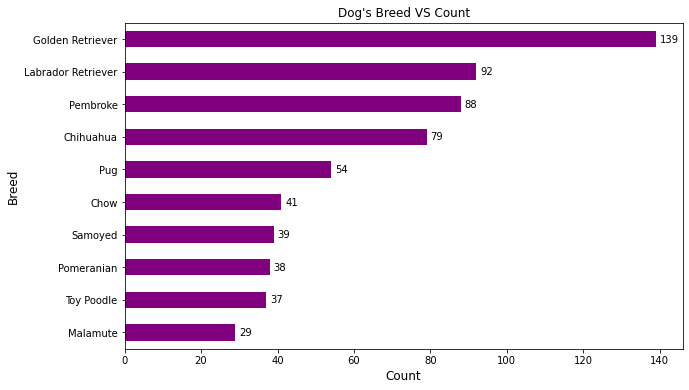

In [201]:
barchart(comp_df['Dog breed'], 'Count', 'Breed', 'Dog\'s Breed VS Count')

#### From the above visualization, it can be seen that Golden_Retriever is the most common breed in the twitter archive (There are 139 tweets for golden_retriever) .

In [194]:
top_10_rating = comp_df.groupby('Dog breed')['rating_numerator'].mean().sort_values(ascending= False)[0:10]
top_10_rating

Dog breed
Soft-Coated Wheaten Terrier    31.818182
Clumber                        27.000000
West Highland White Terrier    22.071429
Groenendael                    20.000000
Brabancon Griffon              20.000000
Walker Hound                   19.000000
Scotch Terrier                 19.000000
Ibizan Hound                   19.000000
Borzoi                         17.777778
German Short-Haired Pointer    17.571429
Name: rating_numerator, dtype: float64

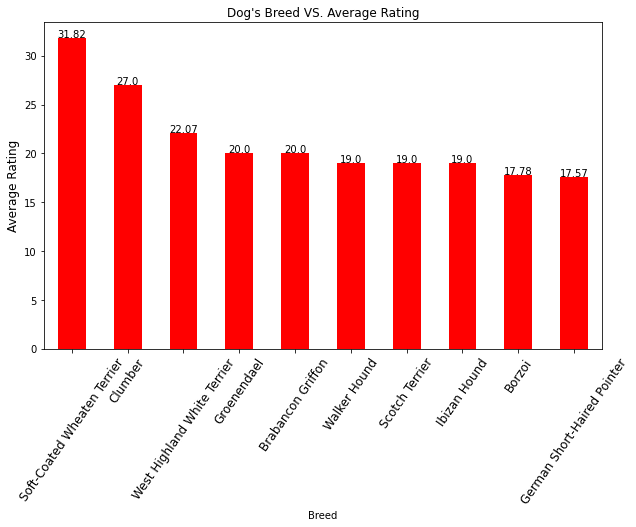

In [203]:
plt.figure(figsize=(10,6))
top_10_rating.plot(kind='bar', color='red')
plt.xticks(rotation= 55, size= 12)
plt.xlabel('Breed', size=10)
plt.ylabel('Average Rating', size= 12)
plt.title('Dog\'s Breed VS. Average Rating');

y= comp_df.groupby('Dog breed')['rating_numerator'].mean().sort_values(ascending= False).round(2)
x= np.arange(0,10,1)

for xx,yy in zip(x,y):
    plt.text(xx, yy+.1, yy, ha='center')

#### Soft Coated Wheaten Terrier has got the highest average rating.

In [196]:
top_favorites = comp_df.groupby('Dog breed')['favorite_count'].mean()[0:10].sort_values(ascending=False)
top_favorites

Dog breed
Afghan Hound                      14706.000000
Basset                            11912.615385
Bedlington Terrier                11152.400000
Australian Terrier                 9550.000000
Appenzeller                        6270.000000
Bernese Mountain Dog               5811.100000
American Staffordshire Terrier     5288.833333
Airedale                           4493.333333
Beagle                             3997.941176
Basenji                            2270.571429
Name: favorite_count, dtype: float64

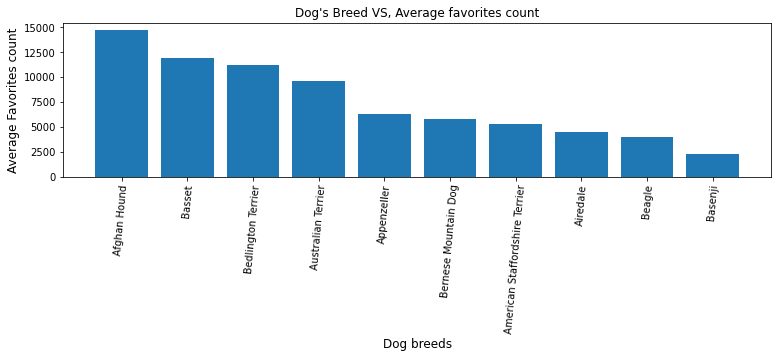

In [197]:
figure= plt.figure(figsize=(12,9))
plt.subplot(2,1,2)
plt.bar(top_favorites.index , top_favorites.values)
plt.ylabel('Average Favorites count' , size= 12)
plt.xlabel('Dog breeds' , size= 12)
plt.title('Dog\'s Breed VS, Average favorites count')
plt.xticks(rotation = 85)

figure.tight_layout(pad=5)

#### Afgan Hound breed is the breed with the most favorites from the archive

,in_reply_to_status_id,in_reply_to_user_id,rating_numerator,rating_denominator,pred_condidence,is_dog,retweet_count,favorite_count
in_reply_to_status_id,1.000000,NaN,-0.081026,-0.067949,0.425057,-0.079810,0.172580,0.608901
in_reply_to_user_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating_numerator,-0.081026,NaN,1.000000,0.191329,-0.021781,-0.050412,-0.012380,-0.026105
rating_denominator,-0.067949,NaN,0.191329,1.000000,-0.004118,0.000814,-0.020184,-0.027129
pred_condidence,0.425057,NaN,-0.021781,-0.004118,1.000000,0.126237,0.048151,0.071013
is_dog,-0.079810,NaN,-0.050412,0.000814,0.126237,1.000000,0.002675,0.043420
retweet_count,0.172580,NaN,-0.012380,-0.020184,0.048151,0.002675,1.000000,0.928404
favorite_count,0.608901,NaN,-0.026105,-0.027129,0.071013,0.043420,0.928404,1.000000


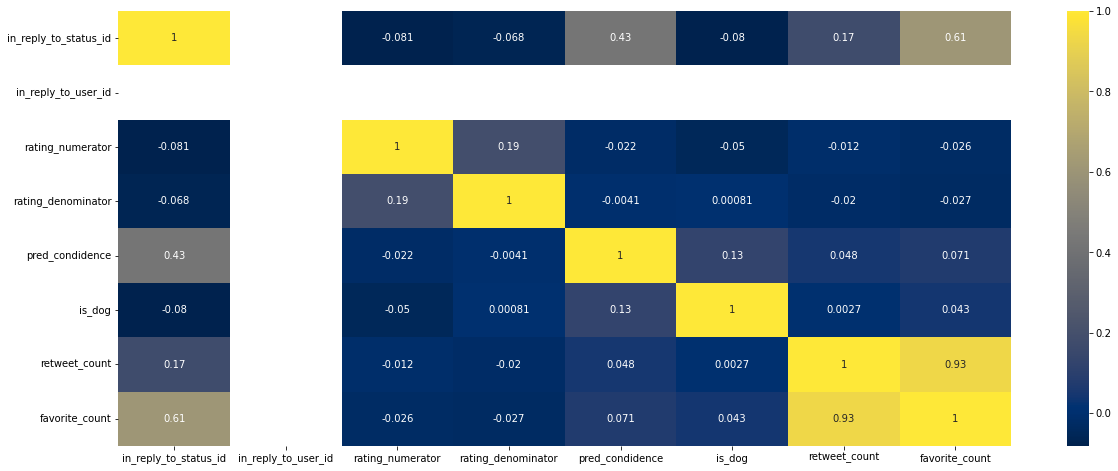

In [167]:
plt.figure(figsize= (20,8))
c= comp_df.corr()
sns.heatmap(c, cmap = 'cividis', annot = True)
c

#### From the above, favourite count and retweet has a corellation of 0.928 which is about 92.8%, this further shows that there is a correlatiion between favorites and retweet and could add further indepth to the analysis of most favourite dog.